In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide code."></form>''')

# I. Loading Data

## Read in Crop Data

After surveying the food data, we found that there were many more missing data points for countries and crops for the year 2012 compared to the the year 2000 (which is surprising because you'd think that more data would be available for recent years). Recall from our Data Exploration tab these visualizations: 

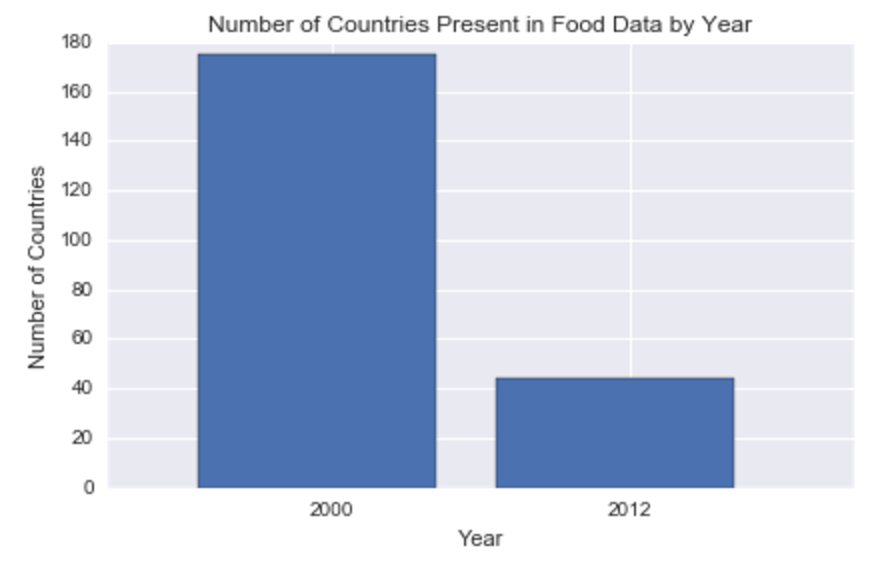

In [28]:
from IPython.display import Image
Image(filename="img/missing_bargraph.png", width = 400)

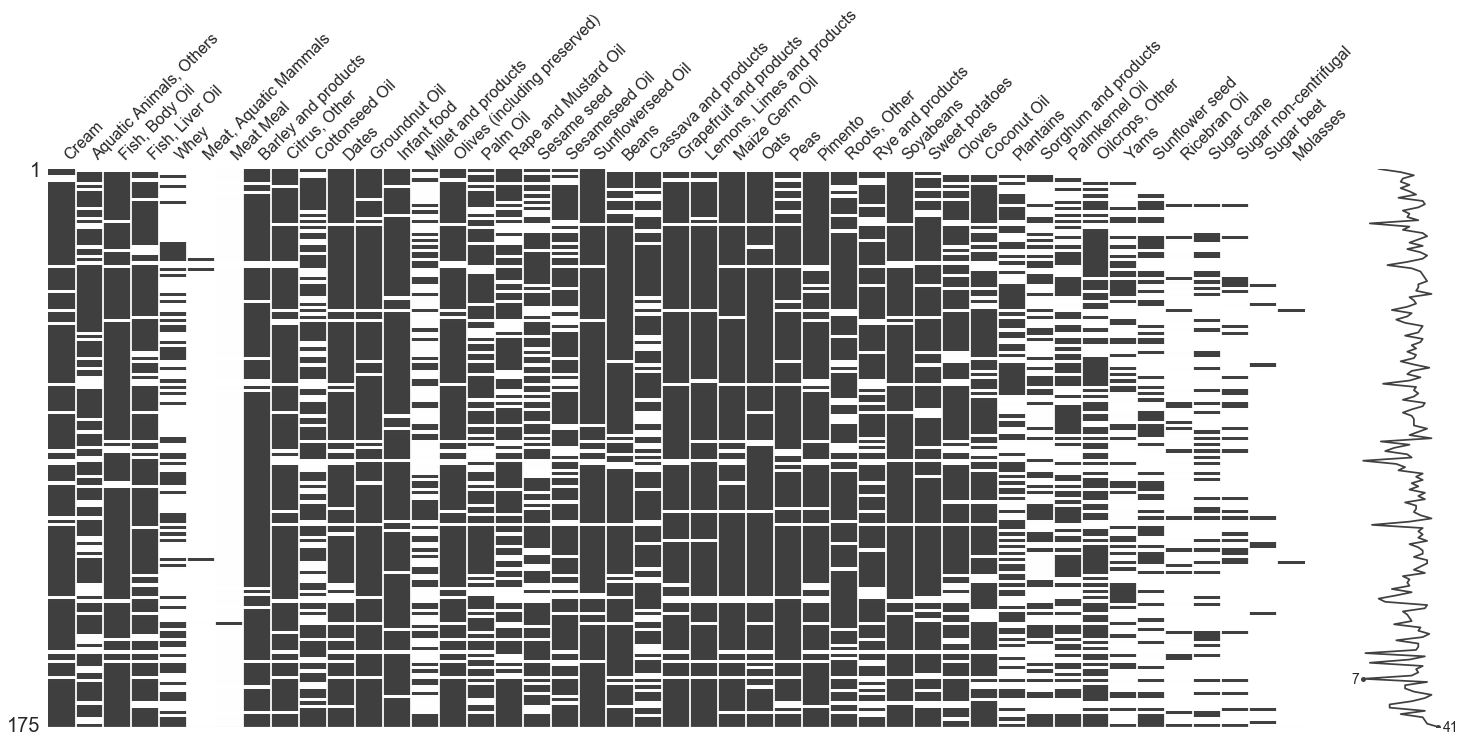

In [29]:
Image(filename="img/missingdata_2000.png", width = 700)

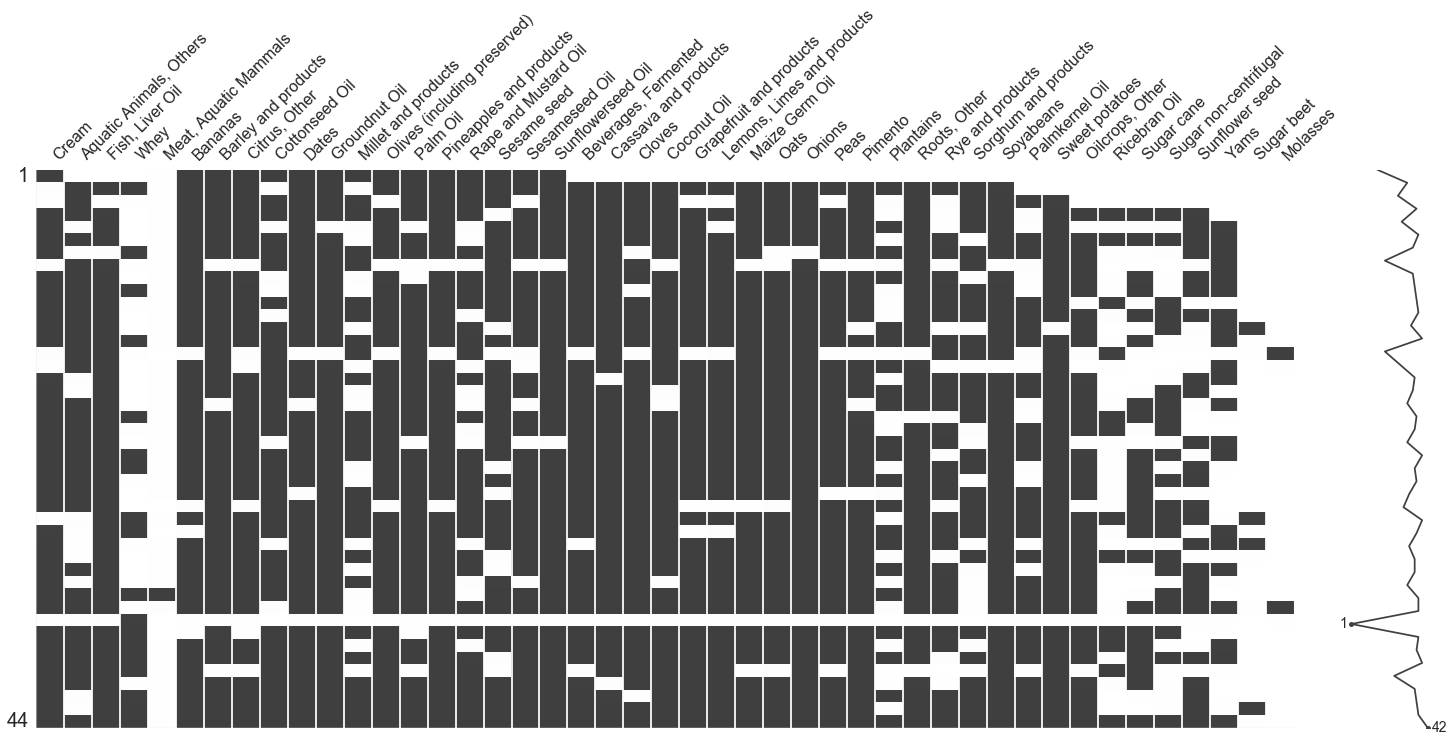

In [30]:
Image(filename="img/missingdata_2012.png", width = 700)

As a result, we decided to focus on the data from the year 2000. Here, we first read in crop data for the year 2000.

In [3]:
# read in crops
allcrops_2000 = pd.read_csv('datasets/allcrops_2000.csv')

## Organize Data by Crop

We plan for the predictors of our model to be the consumption of each of the individual food items. Thus we find all of the unique crop names and extract all of the data for each crop from the original data frame. We store these new crop data frames in a list.

In [4]:
# names of all the crops
crop_names = allcrops_2000['ItemName'].unique()

# remove nan
crop_names = crop_names[:-1]

# list to put our separated crop dataframes
all_crop_dfs = []

# find each crop-separated df and put it in the list of dataframes
for crop in crop_names:
    crop_df = allcrops_2000[(allcrops_2000['ItemName'] == crop)]
    all_crop_dfs.append(crop_df)

## Organize Data by Livestock

We read in the livestock data for the year 2000, for reasons enumerated above. We then cleaned the livestock data using the same technicals as orgnaizing data by crops. We aggregated livestock data into individual data frames with the relevant data for each livestock item. The livestock data also included values for the grand total consumption as well as the population average, which we removed manually.

In [5]:
# Do the same as above, but for livestock
livestock_2000 = pd.read_csv('datasets/livestock_2000.csv')

In [6]:
# list of livestock names
livestock_names_all = livestock_2000['ItemName'].unique()

# remove nan and Population
livestock_names_all = livestock_names_all[1:-1]
livestock_names = []

for name in livestock_names_all:
    if name != 'Grand Total':
        livestock_names.append(name)

# list to put our separated dataframes
livestock_dfs = []

# separate dataframe based on itemname
for crop in livestock_names:
    crop_df = livestock_2000[(livestock_2000['ItemName'] == crop)]
    livestock_dfs.append(crop_df)

## Read in Disease Data

In [7]:
# read in disease rates
column_headers = ["Country", "Year", "Mortality", "Mortality 2", "Mortality 3"]

diabetes = pd.read_csv('datasets/diabetes.csv', names = column_headers)
cardio = pd.read_csv('datasets/cardiovascular.csv', names = column_headers)
cancer= pd.read_csv('datasets/Cancer.csv', names = column_headers)

## Extracting Data for 2000

There is significant food data missing for the year 2012 for many countries, as stated previously, so we decided to focus on data for the year 2000. We thus separate the disease data into years. 

In [8]:
cardio_2012 = cardio[(cardio["Year"] == '2012')] 
cardio_2000 = cardio[(cardio["Year"] == '2000')] 

cancer_2012 = cancer[(cancer['Year'] == ' 2012')] 
cancer_2000 = cancer[(cancer['Year'] == ' 2000')] 

diabetes_2012 = diabetes[(diabetes['Year'] == '2012')] 
diabetes_2000 = diabetes[(diabetes['Year'] == '2000')] 

## Syncing Country Names

Some of the countries in both the crop/livestock data and the disease data, but under different names. The next three cells change the appropriate country names in the disease data to match those in the crop/livestock data. We elected to do this, instead of changing the crop/livestock data, because each country name only occurs once in each of the three disease data frames, while each name appears many times in the food data frames.

In [124]:
for i in range(cancer_2000.shape[0]):
    country = cancer_2000.iloc[i, 0]
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        cancer_2000.iloc[i, 0] = 'United Kingdom'
    elif country == 'China':
        cancer_2000.iloc[i, 0] = 'China, mainland'
    elif country == 'Sudan':
        cancer_2000.iloc[i, 0] = 'Sudan (former)'
    elif country == 'The former Yugoslav republic of Macedonia':
        cancer_2000.iloc[i, 0] = 'The former Yugoslav Republic of Macedonia'
    elif country == 'Cote d\'Ivoire':
        cancer_2000.iloc[i, 0] = 'C\xc3\xb4te d\'Ivoire'
    elif country == 'Czech Republic':
        cancer_2000.iloc[i, 0] = 'Czechia'

In [125]:
for i in range(cardio_2000.shape[0]):
    country = cardio_2000.iloc[i, 0]
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        cardio_2000.iloc[i, 0] = 'United Kingdom'
    elif country == 'China':
        cardio_2000.iloc[i, 0] = 'China, mainland'
    elif country == 'Sudan':
        cardio_2000.iloc[i, 0] = 'Sudan (former)'
    elif country == 'The former Yugoslav republic of Macedonia':
        cardio_2000.iloc[i, 0] = 'The former Yugoslav Republic of Macedonia'
    elif country == 'Cote d\'Ivoire':
        cardio_2000.iloc[i, 0] = 'C\xc3\xb4te d\'Ivoire'
    elif country == 'Czech Republic':
        cardio_2000.iloc[i, 0] = 'Czechia'

In [126]:
for i in range(diabetes_2000.shape[0]):
    country = diabetes_2000.iloc[i, 0]
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        diabetes_2000.iloc[i, 0] = 'United Kingdom'
    elif country == 'China':
        diabetes_2000.iloc[i, 0] = 'China, mainland'
    elif country == 'Sudan':
        diabetes_2000.iloc[i, 0] = 'Sudan (former)'
    elif country == 'The former Yugoslav republic of Macedonia':
        diabetes_2000.iloc[i, 0] = 'The former Yugoslav Republic of Macedonia'
    elif country == 'Cote d\'Ivoire':
        diabetes_2000.iloc[i, 0] = 'C\xc3\xb4te d\'Ivoire'
    elif country == 'Czech Republic':
        diabetes_2000.iloc[i, 0] = 'Czechia'

# II. Organizing Data

In [103]:
cardio_lands = cardio_2000['Country'].unique()
diabetes_lands = diabetes_2000['Country'].unique()
cancer_lands = cancer_2000['Country'].unique()

## Loading Data from 1992 to 2000

Because diseases such as cardiovascular disease, diabetes, and cancer are generally caused by a person's diet over many years, we decided to use food data from 1992-2000 in order to predict disease mortality rates for the year 2000. We decided to start from 1992 because the Soviet Union fell in 1991, resulting in the creation of many new countries.
In general, our naming convention is to add a capital L to the end of a file name that corresponds to livestock.

In [129]:
df = pd.read_csv('datasets/noregions_92_00.csv')
dfL = pd.read_csv('datasets/noregionsL_92_00.csv')

In [77]:
all_countries = df['Country'].unique()

## Surveying missing data

In order to make it easier to access data for a specific crop predictor for a certain country, we decided to organize the data in the dataframe as a dictionary of dictionaries. Otherwise, we would have to iterate through 90,000+ rows of data every time we wanted to find the consumption of Wheat products in Turkmenistan, for example. Not only is this inefficient, it can take over half an hour to pull the data for just one predictor (personal experience, unfortunately).

We created a dictionary where each key is a crop, whose value is a dictionary, with countries as keys and values as the years present in the data for that (country, crop) pair. This data also helped us get an idea of how much data was missing for each country and crop. We applied the same cleaning technique to livestock.

In [29]:
all_crops = df['Item'].unique()

cropdata = {}
for crop in all_crops:
    data = {}
    for i, country in enumerate(df['Country'].values):
        count = 0
        if country in cancer_lands:
            data[country] = []
    for i, country in enumerate(df['Country'].values):
        if df['Item'].values[i] == crop:
            if country in data:
                if len(data[country]) > 0:
                    data[country].append(df['Year'].values[i])
                else:
                    data[country] = [df['Year'].values[i]]
    cropdata[crop] = data

In [130]:
all_ls = dfL['Item'].unique()

lsdata = {}
for ls in all_ls:
    data = {}
    for i, country in enumerate(dfL['Country'].values):
        count = 0
        if country in cancer_lands:
            data[country] = []
    for i, country in enumerate(dfL['Country'].values):
        if dfL['Item'].values[i] == ls:
            if country in data:
                if len(data[country]) > 0:
                    data[country].append(dfL['Year'].values[i])
                else:
                    data[country] = [dfL['Year'].values[i]]
    lsdata[ls] = data

## Introducing Regions

As mentioned previously, the data we used from the Food and Agriculture Organization (FAO) of the UN had a lot of missing values. To fill in the missing values, we felt that KNN would not be appropriate, as each country has its own food traditions, and it's not culturally sensitive to assume that a country's consumption of a certain crop can be deduced by countries that consume other crops similarly. We also considered using countries geographically bordering a certain country to fill in missing values. However, we realized that geographical similarity does not imply cultural similarity.

Our final solution was to use the regional data provided by the FAO. For example, the FAO tells us the Wheat consumption in South Asia, so if there are any countries in South Asia that are missing Wheat consumption, we would fill in the corresponding value for South Asia. This works out because we are using the consumption per capita values. 

In order to make it easy to figure out which region to pull data from for each country, we created a dictionary with countries as keys and values as the corresponding country's region.

In [33]:
def parse_country(dataset): 
    country_full = pd.read_csv(str(dataset))
    country_array = np.unique(country_full["Country"])
    return country_array

In [106]:
import glob
path = 'datasets/countries/' 
allFiles = glob.glob(path + "/*.csv")
country_dictionary = {}
for file in allFiles:
    area_name = file.split('/')[2].split('.')[0]
    country_list = parse_country(file)
    for country in country_list:
        country_dictionary[country] = area_name

In [107]:
regions = set()
for land in country_dictionary:
    regions.add(country_dictionary[land])

## Loading and Organizing Region Data

In [108]:
regions_df = pd.read_csv('datasets/onlyregions_92_00.csv')

In [131]:
regions_dfL = pd.read_csv('datasets/onlyregionsL_92_00.csv')

### Creating a Dictionary of Region Data

Region data was then also organized into a dictionary. In order to make region data easy to access, we created a dictionary with the regions as keys and the values as dictionaries, with crops as keys and lists of (year, consumption value) pairs as values, and did the same for livestock.

In [38]:
regiondata = {}
for i, region in enumerate(regions_df['Country'].unique()):
    regiondata[region] = {}

for i, region in enumerate(regions_df['Country'].values):
    regiondict = regiondata[region]
    crop = regions_df['Item'].values[i]
    year = regions_df['Year'].values[i]
    value = regions_df['Value'].values[i]
    if crop in regiondict:
        regiondata[region][crop].append((year, value))
    else:
        regiondata[region][crop] = [(year, value)]

In [113]:
regiondataL = {}
for i, region in enumerate(regions_dfL['Country'].unique()):
    regiondataL[region] = {}

for i, region in enumerate(regions_dfL['Country'].values):
    regiondict = regiondataL[region]
    ls = regions_dfL['Item'].values[i]
    year = regions_dfL['Year'].values[i]
    value = regions_dfL['Value'].values[i]
    if ls in regiondict:
        regiondataL[region][ls].append((year, value))
    else:
        regiondataL[region][ls] = [(year, value)]

### Functions to extract values from regiondata

These functions help us extract data from our dictionaries regiondata and regiondataL for a given crop/livestock item, region, and year.

In [49]:
def getvalue(region, crop, year):
    if crop in regiondata[region]:
        data = regiondata[region][crop]
        for yr, val in data:
            if yr == year:
                return val
    else:
        return 0

def getvalueL(region, ls, year):
    if ls in regiondataL[region]:
        data = regiondataL[region][ls]
        for yr, val in data:
            if yr == year:
                return val
    else:
        return 0

# Missing Data Imputation 

After surveying the missing data using the dictionaries that we built, we realized that, for any (country, crop) pair, there were only four possibilities for the years of data that exist for that pair: <br><br>
1) all nine years exist <br>
2) all but 1992 exist<br>
3) only 2000 exists<br>
4) no years exist. <br><br>
We took advantage of this function when filling in missing values. For each case, we used our getvalue() and getvalueL() functions accordingly to retrieve the appropriate regional value. We then filled in the appropriate data for the rest of the columns and appended the row to the end of our original data frame. The following printed values represent running time measurements. Since the code was computationally expensive, we wanted to verify that our program was running succesfully and have an indication of how much time is to be expected for further analysis. 

In [50]:
end = dfL.shape[0]
years = [1992 + i for i in range(9)]
domain = dfL['Domain'].values[0]
element = regions_dfL['Element'].values[0]
unit = dfL['Unit'].values[0]

for ls in lsdata:
    for country in lsdata[ls]:
        count += 1
        if len(lsdata[ls][country]) == 9:
            continue
        if len(lsdata[ls][country]) == 8:
            value = getvalueL(country_dictionary[country], ls, 1992)
            dfL.loc[end] = [domain, country, element, ls, year, unit, value]
            end += 1
        if len(lsdata[ls][country]) == 1:
            for i in range(1992, 2000):
                value = getvalueL(country_dictionary[country], ls, i)
                dfL.loc[end] = [domain, country, element, ls, i, unit, value]
                end += 1
        if len(lsdata[ls][country]) == 0:
            for i in range(1992, 2001):
                value = getvalueL(country_dictionary[country], ls, i)
                dfL.loc[end] = [domain, country, element, ls, i, unit, value]
                end += 1

77.83031106


In [51]:
end = df.shape[0]
years = [1992 + i for i in range(9)]
domain = df['Domain'].values[0]
element = regions_df['Element'].values[0]
unit = df['Unit'].values[0]

for crop in cropdata:
    for country in cropdata[crop]:
        count += 1
        if len(cropdata[crop][country]) == 9:
            continue
        if len(cropdata[crop][country]) == 8:
            value = getvalue(country_dictionary[country], crop, 1992)
            df.loc[end] = [domain, country, element, crop, year, unit, value]
            end += 1
        if len(cropdata[crop][country]) == 1:
            for i in range(1992, 2000):
                value = getvalue(country_dictionary[country], crop, i)
                df.loc[end] = [domain, country, element, crop, i, unit, value]
                end += 1
        if len(cropdata[crop][country]) == 0:
            for i in range(1992, 2001):
                value = getvalue(country_dictionary[country], crop, i)
                df.loc[end] = [domain, country, element, crop, i, unit, value]
                end += 1

827.911561966


## Organizing Data Frames
We created dictionaries with crop/livestock items as keys and their corresponding data frames (with data only for the key) as values. A list of all food names was genernated by combining crop and livestock data together. 

In [54]:
crop_names = df['Item'].unique()
all_food_dfs = {}

# find each crop-separated df and put it in the list of dataframes
for crop in crop_names:
    crop_df = df[(df['Item'] == crop)]
    all_food_dfs[crop] = crop_df

In [55]:
ls_names = dfL['Item'].unique()
for ls in ls_names:
    ls_df = dfL[(dfL['Item'] == ls)]
    all_food_dfs[ls] = ls_df

In [56]:
all_names = list(crop_names) + list(ls_names)

In addition, we create a dictionary with countries as keys and dictionaries as values, with food names as keys and (year, consumption value) pairs as values, updated to include our filled in data points.

In [58]:
df_vals = {}
for country in df['Country'].unique():
    if country in cancer_lands:
        data = {}
        for crop in all_names:
            df = all_food_dfs[crop]
            for i, name in enumerate(df['Country'].values):
                if name == country:
                    if crop in data:
                        data[crop].append((df['Year'].values[i], df['Value'].values[i]))
                    else:
                        data[crop] = [(df['Year'].values[i], df['Value'].values[i])]
        df_vals[country] = data
                        

## Averaging Across Years
 
As stated previously, we took into account diet from the years 1992-2000 in order to predict disease mortality rates in 2000. Below, we averaged data across all years from 1992-2000, as generally diets from many yaers contribute to diabetes, cancer, and cardiovascular disease. We then stored all of this information in a dictionary, where the keys are the names of countries and the values are dictionaries, with food names as keys and the average food consumption value across 1992-2000 as values.

In [62]:
predictors = {}
for country in df_vals:
    data = {}
    for crop in df_vals[country]:
        if crop not in df_vals[country]:
            print country, crop
        else:
            year_data = df_vals[country][crop]
            total = 0
            if len(year_data) == 0:
                data[crop] = 0
            else:
                count = 0
                for yr, val in year_data:
                    if not isinstance(val, float) and not isinstance(val, int):
                        continue
                    else:
                        total += val
                        count += 1
                avg = float(total)/float(count)
                data[crop] = avg
    predictors[country] = data

## Creating our X Data Frame

For each country, we accumulated the correct values for all of the predictors and compiled all of the predictors for 156 countries into a data frame. We examined the size of the x dataframe to verify that there were 156 countries available with information on 103 predictors.

In [115]:
x = []
cols = []
for crop in predictors['France']:
    cols.append(crop)
for country in predictors:
    x_vals = []
    for crop in predictors[country]:
        x_vals.append(predictors[country][crop])
    x.append(x_vals)

x_df = pd.DataFrame(x, columns = cols)

(156, 103)


In [66]:
x_df.to_csv('predictors_filled_156.csv')

## Creating our Y Data Frame
For each of the three diseases below, we built a corresponding data frame with the y-values corresponding to the x-values in the data frame of predictors, for each corresponding country in the correct order. We then wrote this data to csv files so that we would not have to run this code over and over again. The size of the Y dataframe was printed to verify that the size of the dataset is consistent across all diseases.

In [134]:
cancer = []
for country in predictors:
    for i, place in enumerate(cancer_2000['Country'].values):
        if place == country:
            cancer.append(cancer_2000['Mortality'].values[i])
            
cancer_df = pd.DataFrame(cancer, columns = ['Cancer Mortality Rate'])

(156, 1)


In [88]:
cancer_df.to_csv('cancer_156.csv')

In [133]:
diabetes = []
for country in predictors:
    for i, place in enumerate(diabetes_2000['Country'].values):
        if place == country:
            diabetes.append(diabetes_2000['Mortality'].values[i])
            
diabetes_df = pd.DataFrame(diabetes, columns = ['Diabetes Mortality Rate'])

(156, 1)


In [87]:
diabetes_df.to_csv('diabetes_156.csv')

In [132]:
cardio = []
for country in predictors:
    for i, place in enumerate(cardio_2000['Country'].values):
        if place == country:
            cardio.append(cardio_2000['Mortality'].values[i])
            
cardio_df = pd.DataFrame(cardio, columns = ['Cardio Mortality Rate'])

(156, 1)


In [86]:
cardio_df.to_csv('cardio_156.csv')